In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'../../Projects\04-Titanic\assets\train.csv')

In [2]:
for group, frame in df.groupby('Sex'):  # Analisando todas as colunas ao mesmo tempo
    print(frame['Sex'][:3])

1    female
2    female
3    female
Name: Sex, dtype: object
0    male
4    male
5    male
Name: Sex, dtype: object


In [3]:
g = df.groupby(['Sex', 'Pclass'])
g.groups.keys()

dict_keys([('female', 1), ('female', 2), ('female', 3), ('male', 1), ('male', 2), ('male', 3)])

In [4]:
import numpy as np

results = {}
combinations = df.groupby(['Pclass', 'Sex']).groups.keys()

for combo in combinations:
    results[combo] = []

for c in range(1, 50):
    filtered_df = df[df['Age'] > c]

    if not filtered_df.empty:
        grouped = filtered_df.groupby(['Pclass', 'Sex'])['Survived'].mean()
        for combo in combinations:
            results[combo].append(grouped.get(combo, np.nan))
    else:
        for combo in combinations:
            results[combo].append(np.nan)

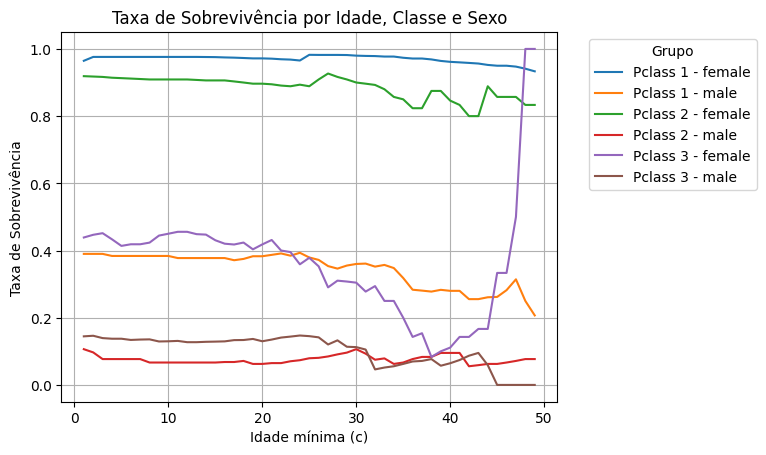

In [5]:
ages = list(range(1, 50))

plt.title('Taxa de Sobrevivência por Idade, Classe e Sexo')
plt.xlabel('Idade mínima (c)')
plt.ylabel('Taxa de Sobrevivência')

for combo, survivals in results.items():
    pclass, sex = combo
    label = f'Pclass {pclass} - {sex}'
    plt.plot(ages, survivals, label=label)

plt.legend(title='Grupo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [6]:
df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.max())

Sex     Pclass
female  1         63.0
        2         57.0
        3         63.0
male    1         80.0
        2         70.0
        3         74.0
Name: Age, dtype: float64

In [7]:
g = df.groupby(['Sex', 'Pclass']).filter(lambda x: x['Survived'].sum() > 50)
g = g.groupby(['Sex', 'Pclass'])['Survived'].agg(['mean', 'sum', 'count'])
g['deaths'] = g['count'] - g['sum']
g

mean  sum  count  deaths
Sex    Pclass                              
female 1       0.968085   91     94       3
       2       0.921053   70     76       6
       3       0.500000   72    144      72

In [8]:
df.groupby(['Pclass', 'Sex'])['Age'].transform('mean')  # Criar novas colunas apartir de agrupamentos

0      26.507589
1      34.611765
2      21.750000
3      34.611765
4      26.507589
         ...    
886    30.740707
887    34.611765
888    21.750000
889    41.281386
890    26.507589
Name: Age, Length: 891, dtype: float64

In [37]:
# df.diff()

In [35]:
df.reset_index(inplace=True)
df.set_index('Age', inplace=True)

def classe(index):
    if index < 18:
        return 'new'
    elif 18 < index <= 50:
        return 'adult' 
    else:
        return 'older'
    
df.groupby(classe)[['Survived', 'Fare']].agg({'Survived':'count', 'Fare': ('mean', 'median')})

Survived       Fare       
         count       mean median
Age                             
adult      511  34.175292   13.0
new        113  31.220798   23.0
older      267  28.848033   13.0